In [105]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, cross_validate 

import matplotlib.pyplot as plt

1. First Demo: XGBoost Python Package

In [3]:
#Load the data into DMatrix for use of xgboost
df_all = pd.read_csv('cs-training.csv')

#Select data we are going to analyse 
x = df_all.iloc[:, 1:45]
x_part = x.iloc[:, [0, 1, 2, 3, 17, 18, 19, 20, 5, 6, 7, 8, 16]]
y = df_all.iloc[:, 0]
#print(type(x_part))
print(x_part.isnull().sum()) #Check if there is NA

x_train, x_test, y_train, y_test = train_test_split(x_part, y, test_size = 0.25, random_state=42) 
#Split training and test set to validate the model.

#Put it into DMatrix
dtrain = xgb.DMatrix(x_train, y_train)
#print(dmatrix)

#Create DMatrix form of test set.
dtest = xgb.DMatrix(x_test)

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome_IfNA                      0
MonthlyIncome_1                         0
MonthlyIncome_2                         0
MonthlyIncome_3                         0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents_impute               0
dtype: int64


In [4]:
#XGBoost set the parameters by list
param = {'max_depth': 6, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

#objective can be varied. For multiple classes classfication, multi:softmax will be used 
#we also need to set num_class(number of classes)
#for measuring model performance
#print(param)

#Put the data and parameter list to the function/model.
xgb_tree = xgb.train(param, dtrain) #The list of parameters which have been tuned must be placed at first position.

#Make out-sample prediction>>> Put the test set of x (should be dmatrix format) into trained model.
ypred_out = xgb_tree.predict(dtest)
ypred_in = xgb_tree.predict(dtrain)

0.9352266666666667
0.9409777777777778
0.19757575757575757
0.25201960005297314
AUC of test set prediction= 0.5925
AUC of training set prediction = 0.6213


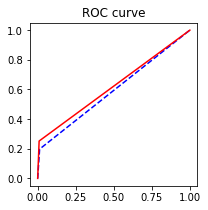

In [5]:
#Measure the model performance
adj_ypred_out = (ypred_out > 0.5).astype('int')
adj_ypred_in = (ypred_in > 0.5).astype('int')
y_test_adj = np.array(y_test)
y_train_adj = np.array(y_train)
#print(type(adj_ypred_out))
#print(type(y_test_adj))
#print(adj_ypred_out)

###Accuracy 
#Predict over test set
print(accuracy_score(adj_ypred_out, y_test_adj))

#Predict over training set
print(accuracy_score(adj_ypred_in, y_train_adj))

###Precision
print(precision_score(adj_ypred_out, y_test_adj))
print(precision_score(adj_ypred_in, y_train_adj))

###AUC
#ROC and AUROC
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test_adj, adj_ypred_out)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train_adj, adj_ypred_in)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')


#AUROC
print('AUC of test set prediction= %.4f' %metrics.auc(fpr_test, tpr_test))
print('AUC of training set prediction = %.4f' %metrics.auc(fpr_train, tpr_train))


In [6]:
###Cross validation

#For cross validation, we would like to do n-fold validaitons in training data to obtain the better-tuned or best-found models.
#And test set is holded out for further test for final best-found models.
#Load the data into DMatrix for use of xgboost
df_all = pd.read_csv('cs-training.csv')

#Select data we are going to analyse 
x = df_all.iloc[:, 1:45]
x_part = x.iloc[:, [0, 1, 2, 3, 17, 18, 19, 20, 5, 6, 7, 8, 16]]
y = df_all.iloc[:, 0]
#print(type(x_part))
print(x_part.isnull().sum()) #Check if there is NA


#Put it into DMatrix
dtrain = xgb.DMatrix(x_train, y_train)
#print(dmatrix)

#Create DMatrix form of test set.
dtest = xgb.DMatrix(x_test)

### Cross Validation
#If we would like to cross validate xgb module, consider xgb.cv()
cvresult = xgb.cv(param, dtrain, nfold= 15, metrics='auc')

print(cvresult)


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome_IfNA                      0
MonthlyIncome_1                         0
MonthlyIncome_2                         0
MonthlyIncome_3                         0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents_impute               0
dtype: int64
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.851909       0.000752       0.847793      0.008758
1        0.857809       0.000609       0.851263      0.008777
2        0.865024       0.001212       0.855594      0.008437
3        0.870485       0.000875       0.857387      0.009655
4        0.874031       0.000717       0.856775      0.009072
5        0.876813       0.000836       0.855991      0.008974
6      

2. Second Demo: Sklearn.XGBClassifier() 

In [2]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate 

In [3]:
# Load the dataset
df_all = pd.read_csv('cs-training.csv')

#Select data we are going to analyse 
x = df_all.iloc[:, 1:45]
x_part = x.iloc[:, [0, 1, 2, 3, 17, 18, 19, 20, 5, 6, 7, 8, 16]]
y = df_all.iloc[:, 0]

# Assign the model (the most orignial model)
clf_xgb = XGBClassifier()
clf_xgb.get_params() #Get the default settings of xgb model.

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [5]:
#Set the final model we want in this stage.
dclf_xgb = XGBClassifier(objective = 'binary:logistic', gamma = 0, n_estimators = 100, max_depth = 6, 
                        learning_rate = 1, nthread = 4)
#Note: we tune the parameters to those similar to xgb() part.

#Split training and test set
x_train, x_test, y_train, y_test = train_test_split(x_part, y, test_size = 0.25, random_state=42)

#Fit the determined model to the data
dclf_xgb.fit(x_train, y_train)

#Preidct over training and test set
pred_in = dclf_xgb.predict(x_train)

pred_out = dclf_xgb.predict(x_test)


Accuracy of training set prediction: 0.9589866666666667
Accuracy of test set prediction: 0.9295466666666666
Precision of training set prediction: 0.8515681110845104
Precision of test set prediction: 0.43532145623547636
AUC of test set prediction= 0.6031
AUC of training set prediction = 0.7326


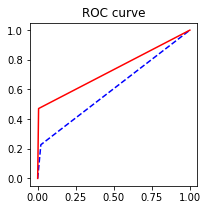

In [7]:
# Measure the training and testing performance using accuracy, precision and AUC

#Accuracy
print('Accuracy of training set prediction:', accuracy_score(y_train, pred_in))
print('Accuracy of test set prediction:', accuracy_score(y_test, pred_out))

#Precision
print('Precision of training set prediction:', precision_score(y_train, pred_in))
print('Precision of test set prediction:', precision_score(y_test, pred_out))


###AUC
#ROC and AUROC
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, pred_out)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, pred_in)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')


#AUROC
print('AUC of test set prediction= %.4f' %metrics.auc(fpr_test, tpr_test))
print('AUC of training set prediction = %.4f' %metrics.auc(fpr_train, tpr_train))


Cross Validation

In [8]:
### Cross validation
#Another method for cross validation: 
#cross_val_score(model, training_data, cv = n, scoring = 'auc')
#TypeError: estimator should be an estimator implementing 'fit' method
#XGBClassifier() can be implemented by this using .fit().

# We use the training set which we split from 75% of original data to do cross validation, but not all original dataset.
# We also leave test set alone for future model test when parameter and feature are done.

cv = cross_validate(dclf_xgb, x_train, y_train, cv = 15,
                   scoring = ('precision', 'roc_auc'))

print(cv)

#Note:
#'fit_time' means the time for fitting the estimator on the train set for each cv split.
#'score_time' means the time for scoring the estimator on the test set for each cv split. 
#Note time for scoring on the "train set" is not included even if return_train_score is set to True

{'fit_time': array([ 9.27060652,  8.99134994,  9.70561171, 10.07190251,  6.62972426,
        7.45627284, 10.05198336,  9.59284997,  8.85247016,  9.71260571,
        9.01752758,  8.73211789,  9.20659041,  9.25545907,  9.33449435]), 'score_time': array([0.08948946, 0.07932925, 0.07008362, 0.07622361, 0.06569457,
       0.08632517, 0.08581138, 0.06967163, 0.04812789, 0.0682447 ,
       0.07315493, 0.07046676, 0.07287884, 0.07605267, 0.07877088]), 'test_precision': array([0.41877256, 0.42168675, 0.39163498, 0.41132075, 0.46460177,
       0.46      , 0.4296875 , 0.40740741, 0.39285714, 0.44520548,
       0.48809524, 0.4229249 , 0.43928571, 0.44444444, 0.41696113]), 'test_roc_auc': array([0.81377989, 0.82252874, 0.80320663, 0.8143679 , 0.81808776,
       0.80219554, 0.81314528, 0.82186274, 0.82456668, 0.82504373,
       0.82778694, 0.81631794, 0.83059594, 0.80450564, 0.81147802])}


In [17]:
#Check the result form of cv

#Use the name of array to call the testing metrics
print('Precision of 15-fold validation on test:', cv['test_precision'])
print('Precision of 15-fold validation on test:', cv['test_roc_auc'])

#Take the mean of the metrics over 15 times validation
print('Mean Precision:', cv['test_precision'].mean())
print('Mean AUC:', cv['test_roc_auc'].mean())

Precision of 15-fold validation on test: [0.41877256 0.42168675 0.39163498 0.41132075 0.46460177 0.46
 0.4296875  0.40740741 0.39285714 0.44520548 0.48809524 0.4229249
 0.43928571 0.44444444 0.41696113]
Precision of 15-fold validation on test: [0.81377989 0.82252874 0.80320663 0.8143679  0.81808776 0.80219554
 0.81314528 0.82186274 0.82456668 0.82504373 0.82778694 0.81631794
 0.83059594 0.80450564 0.81147802]
Mean Precision: 0.43032571828344984
Mean AUC: 0.8166312908460043


Grid Search

In [15]:
############### Grid Search CrossValidation ###############
### Grid parameters and do cross-validation over them to obtain a better conbination of parameters.
### This is done here by using training set, while test set is left for being predicted by final, well-tuned parameters/model.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [6]:

#Set up the parameters to test
param_to_test = {'n_estimators':range(100, 110, 2),
                 'max_depth':range(6, 12, 2)}

grid_cv = GridSearchCV(estimator = dclf_xgb, param_grid = param_to_test, scoring = 'roc_auc', cv = 5,
                      refit = True) #scoring=('roc_auc', 'precision') to test multi-metrics but 'refit' must be False in this case.

#Run fit of all sets of parameters
grid_cv_fit = grid_cv.fit(x_train, y_train)
#This will take time to validate various combination of grided parameters.



In [18]:
###Show the results of Grid CV

#See the best parameter grids
print(grid_cv.best_params_)

#print(grid_cv.cv_results_) #To see the full results from each combination of parameters

#See mean and standard error for the validated results
means = grid_cv.cv_results_['mean_test_score']
stds = grid_cv.cv_results_['std_test_score']

print(grid_cv.cv_results_['params']) #Some messy results.

#Integrate the validation process and results in a table.
for mean, std, params in zip(means, stds, grid_cv.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()


{'max_depth': 6, 'n_estimators': 100}
[{'max_depth': 6, 'n_estimators': 100}, {'max_depth': 6, 'n_estimators': 102}, {'max_depth': 6, 'n_estimators': 104}, {'max_depth': 6, 'n_estimators': 106}, {'max_depth': 6, 'n_estimators': 108}, {'max_depth': 8, 'n_estimators': 100}, {'max_depth': 8, 'n_estimators': 102}, {'max_depth': 8, 'n_estimators': 104}, {'max_depth': 8, 'n_estimators': 106}, {'max_depth': 8, 'n_estimators': 108}, {'max_depth': 10, 'n_estimators': 100}, {'max_depth': 10, 'n_estimators': 102}, {'max_depth': 10, 'n_estimators': 104}, {'max_depth': 10, 'n_estimators': 106}, {'max_depth': 10, 'n_estimators': 108}]
0.814 (+/-0.010) for {'max_depth': 6, 'n_estimators': 100}
0.814 (+/-0.010) for {'max_depth': 6, 'n_estimators': 102}
0.814 (+/-0.010) for {'max_depth': 6, 'n_estimators': 104}
0.814 (+/-0.010) for {'max_depth': 6, 'n_estimators': 106}
0.813 (+/-0.010) for {'max_depth': 6, 'n_estimators': 108}
0.797 (+/-0.012) for {'max_depth': 8, 'n_estimators': 100}
0.797 (+/-0.013) 

Precision: Out-sample Prediction based on best-found parameters of Grid CV: 0.22707070707070706
Precision: In-sample Prediction based on best-found parameters of Grid CV: 0.4710634353065819
AUC of test set prediction= 0.6031
AUC of training set prediction = 0.7326
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     36209
           1       0.23      0.44      0.30      1291

    accuracy                           0.93     37500
   macro avg       0.60      0.69      0.63     37500
weighted avg       0.95      0.93      0.94     37500



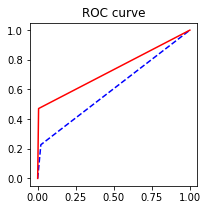

In [22]:
### Grid CV Prediction and Measurement.

grid_cv_pred_out = grid_cv.predict(x_test) #Call predict on the estimator with the best found parameters.
print('Precision: Out-sample Prediction based on best-found parameters of Grid CV:', 
      precision_score(grid_cv_pred_out, y_test))

grid_cv_pred_in = grid_cv.predict(x_train)
print('Precision: In-sample Prediction based on best-found parameters of Grid CV:', 
      precision_score(grid_cv_pred_in, y_train))

###AUC
#ROC and AUROC
fpr_test, tpr_test, th_test = metrics.roc_curve(y_test, grid_cv_pred)
fpr_train, tpr_train, th_train = metrics.roc_curve(y_train, pred_in)

plt.figure(figsize=[3, 3])
plt.plot(fpr_test, tpr_test, 'b--')
plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')

#AUROC
print('AUC of test set prediction= %.4f' %metrics.auc(fpr_test, tpr_test))
print('AUC of training set prediction = %.4f' %metrics.auc(fpr_train, tpr_train))

###Classification Report: Model performance of predict/identify classes over 3 metrics.
print(classification_report(grid_cv_pred, y_test))


In [ ]:
'''
xgb_tree.save_model('0001.model')
xgb_tree = xgb.Booster({'nthread': 4}) 
xgb_tree.load_model('model.bin')
xgb.plot_importance()
'''

In [ ]:
'''
from graphviz import Source
xgb_tree.dump_model('dump.raw.txt')
xgb.plot_tree(xgb_tree, num_trees=2)
'''
